In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install --quiet gdown ultralytics

import os, zipfile, random, shutil
import gdown
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Download & unzip
for url, out in [
    ("https://drive.google.com/file/d/1Yp0If_pGQyOSVaOFUS5piLypDuLiO5tK/view?usp=share_link", "preliminary.zip"),
    ("https://drive.google.com/file/d/1nQBjcg6-sU3yOxMzi0ybTwpQx4H5xuV0/view?usp=share_link", "object_detection.zip"),
    ("https://drive.google.com/file/d/1sd7diZGvNW3-BO0LnYqmTdaCdZKgToJp/view?usp=share_link", "segmentation.zip"),
]:
    print(f"Downloading {out} …")
    gdown.download(url, out, fuzzy=True)
    print(f"Unzipping {out} …")
    with zipfile.ZipFile(out, 'r') as z:
        z.extractall(out.replace('.zip',''))
    print()

# 2) Clone just to pull in your annotation files
!git clone https://github.com/abdulwahabamin/keras-yolo3-attention.git
%cd keras-yolo3-attention

# 3) Load class names
with open("model_data/garbage_classes.txt") as f:
    class_names = [l.strip() for l in f if l.strip()]
print(f"{len(class_names)} classes → {class_names}")

# 4) Parse the annotation file
image_annotations = []
with open("annot_labels.txt") as f:
    for line in f:
        parts = line.strip().split()
        if not parts: continue
        img_rel, *boxes = parts
        bbs = [tuple(map(int, b.split(','))) for b in boxes]
        image_annotations.append({"img_path": img_rel, "bboxes": bbs})
print(f"Parsed {len(image_annotations)} entries")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is inco

Downloading...
From (original): https://drive.google.com/uc?id=1Yp0If_pGQyOSVaOFUS5piLypDuLiO5tK
From (redirected): https://drive.google.com/uc?id=1Yp0If_pGQyOSVaOFUS5piLypDuLiO5tK&confirm=t&uuid=c0502fe0-05f4-4b81-82f7-30fd5d64d189
To: /kaggle/working/preliminary.zip
100%|██████████| 522M/522M [00:07<00:00, 68.7MB/s] 


Unzipping preliminary.zip …



Downloading...
From (original): https://drive.google.com/uc?id=1nQBjcg6-sU3yOxMzi0ybTwpQx4H5xuV0
From (redirected): https://drive.google.com/uc?id=1nQBjcg6-sU3yOxMzi0ybTwpQx4H5xuV0&confirm=t&uuid=fc934e5d-e468-4129-82d7-11bbbb9a88f6
To: /kaggle/working/object_detection.zip
100%|██████████| 2.91G/2.91G [00:32<00:00, 90.4MB/s]


Unzipping object_detection.zip …



Downloading...
From (original): https://drive.google.com/uc?id=1sd7diZGvNW3-BO0LnYqmTdaCdZKgToJp
From (redirected): https://drive.google.com/uc?id=1sd7diZGvNW3-BO0LnYqmTdaCdZKgToJp&confirm=t&uuid=5389a6fc-1130-4e17-9053-879bab77a773
To: /kaggle/working/segmentation.zip
100%|██████████| 1.72G/1.72G [00:17<00:00, 100MB/s] 


Unzipping segmentation.zip …

Cloning into 'keras-yolo3-attention'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 122 (delta 51), reused 100 (delta 29), pack-reused 0 (from 0)
Receiving objects: 100% (122/122), 9.29 MiB | 26.94 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/kaggle/working/keras-yolo3-attention
12 classes → ['plastic_bag', 'plastic_wrapper', 'plastic_bottle', 'plastic_cap', 'shoes', 'decor', 'cigarette', 'paper_wrapper', 'cardboard', 'tetrapak', 'cluster', 'other']
Parsed 12650 entries


In [3]:
# 5) **Recursively** copy every JPEG from the unzipped train folder into `images/`
raw_jpegs = Path("/kaggle/working/object_detection/WaterTrash_ObjectDetection_LUMS2021_v1/JPEGImages")
images_dir = Path("images")
if images_dir.exists(): shutil.rmtree(images_dir)
shutil.copytree(raw_jpegs, images_dir)  # copies everything, including .JPG/.jpg

# 6) Remap every annotation to point into our new `images/` folder
for ann in image_annotations:
    ann["img_path"] = str(images_dir / Path(ann["img_path"]).name)

# Quick sanity check
print("First 5 mapped paths:")
for a in image_annotations[:5]:
    print(" ", a["img_path"])

random.seed(42)
random.shuffle(image_annotations)
split = int(0.8 * len(image_annotations))
train_data = image_annotations[:split]
val_data   = image_annotations[split:]
print(f"Train: {len(train_data)}   Val: {len(val_data)}")


First 5 mapped paths:
  images/artificial_0.jpg
  images/artificial_1.jpg
  images/artificial_10.jpg
  images/artificial_100.jpg
  images/artificial_1000.jpg
Train: 10120   Val: 2530


In [4]:
# Cell 3 — prepare YOLOv8‐style folders under data/
from pathlib import Path
import shutil, cv2

# base directory for your dataset
base = Path('data')

# make sure both images/ and labels/ with train/val exist
for split in ('train','val'):
    (base/'images'/split).mkdir(parents=True, exist_ok=True)
    (base/'labels'/split).mkdir(parents=True, exist_ok=True)

# helper to pick the right list
splits = {'train': train_data, 'val': val_data}

for split, annotations in splits.items():
    img_out = base/'images'/split
    lbl_out = base/'labels'/split

    for ann in annotations:
        src = Path(ann['img_path'])
        # copy image
        dst_img = img_out/src.name
        shutil.copy(src, dst_img)

        # open original to get width/height
        h, w = cv2.imread(str(src)).shape[:2]

        # build YOLO‐format lines: class x_center y_center width height (all normalized)
        lines = []
        for x1, y1, x2, y2, cls in ann['bboxes']:
            xc = ((x1 + x2) / 2) / w
            yc = ((y1 + y2) / 2) / h
            bw = (x2 - x1) / w
            bh = (y2 - y1) / h
            lines.append(f"{cls} {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}")

        # write label file with same stem as image
        (lbl_out/f"{src.stem}.txt").write_text("\n".join(lines))

print("✔ data/images/train, data/images/val and data/labels/train, data/labels/val are ready")


✔ data/images/train, data/images/val and data/labels/train, data/labels/val are ready


In [5]:
%%writefile data/garbage.yaml
# data/garbage.yaml

train: images/train
val:   images/val


nc: 12
names:
  0: plastic_bag
  1: plastic_wrapper
  2: plastic_bottle
  3: plastic_cap
  4: shoes
  5: decor
  6: cigarette
  7: paper_wrapper
  8: cardboard
  9: tetrapak
  10: cluster
  11: other


Writing data/garbage.yaml


In [6]:
import ultralytics
from ultralytics import YOLO

print("YOLOv8 version:", ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 version: 8.3.124


In [7]:
# start from a tiny pre‑trained checkpoint
model = YOLO('yolov8s.pt')
model.info()


100%|██████████| 21.5M/21.5M [00:00<00:00, 327MB/s]


YOLOv8s summary: 129 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


(129, 11166560, 0, 28.816844800000002)

In [9]:
# Cell 8 — train with v8s (and rename project)
results = model.train(
    data='/kaggle/working/keras-yolo3-attention/data/garbage.yaml',
    epochs=20,
    imgsz=320,
    batch=4,
    workers=2,
    project='runs/train',
    name='garbage_v8s',
    device=0
)


Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/keras-yolo3-attention/data/garbage.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=0, workers=2, project=runs/train, name=garbage_v8s2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 40.3MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 174MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3235.1±635.3 MB/s, size: 252.9 KB)


train: Scanning /kaggle/working/keras-yolo3-attention/data/labels/train... 10120 images, 0 backgrounds, 1 corrupt: 100%|██████████| 10120/10120 [00:06<00:00, 1464.47it/s]

train: /kaggle/working/keras-yolo3-attention/data/images/train/artificial_2295.jpg: 1 duplicate labels removed
train: /kaggle/working/keras-yolo3-attention/data/images/train/itu_4577.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1906]


train: New cache created: /kaggle/working/keras-yolo3-attention/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2200.0±1232.6 MB/s, size: 233.4 KB)


val: Scanning /kaggle/working/keras-yolo3-attention/data/labels/val... 2530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2530/2530 [00:01<00:00, 1449.38it/s]

val: New cache created: /kaggle/working/keras-yolo3-attention/data/labels/val.cache


Plotting labels to runs/train/garbage_v8s2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/train/garbage_v8s2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.543G      1.799      1.845     0.8951         25        320: 100%|██████████| 2530/2530 [03:26<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:23<00:00, 13.42it/s]


                   all       2530       9064      0.761      0.248      0.252      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.553G      1.711      1.261     0.8882         14        320: 100%|██████████| 2530/2530 [03:22<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.95it/s]


                   all       2530       9064       0.79      0.253      0.294      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.553G      1.701      1.223     0.8829          9        320: 100%|██████████| 2530/2530 [03:16<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.66it/s]


                   all       2530       9064       0.82      0.258      0.337      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.553G      1.648      1.179      0.873         16        320: 100%|██████████| 2530/2530 [03:17<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.66it/s]


                   all       2530       9064      0.755      0.276      0.332      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.553G      1.625      1.131     0.8735         17        320: 100%|██████████| 2530/2530 [03:20<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.07it/s]


                   all       2530       9064       0.84      0.288      0.354      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.553G      1.595      1.098     0.8672         15        320: 100%|██████████| 2530/2530 [03:19<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.24it/s]


                   all       2530       9064      0.758      0.312      0.402      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.553G      1.571      1.071     0.8623         29        320: 100%|██████████| 2530/2530 [03:18<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.36it/s]


                   all       2530       9064      0.769      0.327      0.405       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.553G       1.55       1.04     0.8622          9        320: 100%|██████████| 2530/2530 [03:18<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.64it/s]


                   all       2530       9064      0.811      0.326      0.455      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.553G      1.526      1.019     0.8593          7        320: 100%|██████████| 2530/2530 [03:19<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.57it/s]


                   all       2530       9064      0.744      0.392      0.437      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.553G      1.514      1.001      0.859         15        320: 100%|██████████| 2530/2530 [03:21<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.28it/s]


                   all       2530       9064       0.82      0.345      0.482      0.305
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.553G      1.543       1.01     0.8527         13        320: 100%|██████████| 2530/2530 [03:03<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.28it/s]


                   all       2530       9064      0.645      0.469      0.491      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.553G      1.525     0.9796     0.8517          5        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.19it/s]


                   all       2530       9064      0.682      0.455      0.496      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.553G      1.499     0.9656     0.8494         11        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.23it/s]


                   all       2530       9064      0.698      0.438      0.503      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.553G      1.483     0.9392      0.843         15        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.34it/s]


                   all       2530       9064       0.74      0.382      0.486      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.553G      1.469     0.9145     0.8462         12        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.58it/s]


                   all       2530       9064      0.745      0.484      0.546      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.553G      1.454     0.8984       0.84          9        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.31it/s]


                   all       2530       9064      0.704      0.507      0.531      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.553G      1.433     0.8807     0.8393          6        320: 100%|██████████| 2530/2530 [03:03<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.21it/s]


                   all       2530       9064      0.829      0.519      0.594      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.553G      1.413     0.8619     0.8361         13        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:22<00:00, 14.36it/s]


                   all       2530       9064      0.791      0.512      0.591      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.553G      1.409     0.8438     0.8376         11        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.45it/s]


                   all       2530       9064      0.837      0.514      0.605      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.553G      1.375     0.8148     0.8355         10        320: 100%|██████████| 2530/2530 [03:02<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:21<00:00, 14.65it/s]


                   all       2530       9064      0.789      0.561      0.618      0.394

20 epochs completed in 1.189 hours.
Optimizer stripped from runs/train/garbage_v8s2/weights/last.pt, 22.5MB
Optimizer stripped from runs/train/garbage_v8s2/weights/best.pt, 22.5MB

Validating runs/train/garbage_v8s2/weights/best.pt...
Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:20<00:00, 15.35it/s]


                   all       2530       9064      0.791      0.559      0.618      0.393
           plastic_bag       2400       7152      0.811      0.561      0.706      0.359
       plastic_wrapper        831       1053       0.78      0.579      0.687      0.402
        plastic_bottle         27         31      0.657      0.516      0.616      0.313
           plastic_cap         22         22          1          0     0.0112    0.00667
                 shoes          7          7          1      0.737      0.978      0.636
                 decor          7          7      0.623      0.947      0.909      0.682
             cigarette          4          4          1          0     0.0129    0.00806
         paper_wrapper         73         82      0.578      0.671      0.674      0.425
             cardboard         25         25      0.906       0.96      0.978      0.551
              tetrapak         23         25      0.552       0.36      0.367      0.224
               cluste

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/train/garbage_v8s2


In [10]:
# Cell 9 — validation
metrics = model.val()
print(f"mAP@0.5 = {metrics.box.map50:.3f}")


Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2436.8±991.7 MB/s, size: 216.6 KB)


val: Scanning /kaggle/working/keras-yolo3-attention/data/labels/val.cache... 2530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2530/2530 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 633/633 [00:18<00:00, 35.06it/s]


                   all       2530       9064      0.786      0.569      0.618      0.398
           plastic_bag       2400       7152      0.806      0.568      0.706       0.36
       plastic_wrapper        831       1053      0.772      0.587      0.688      0.402
        plastic_bottle         27         31      0.649      0.516      0.615      0.311
           plastic_cap         22         22          1          0     0.0112    0.00664
                 shoes          7          7          1      0.771      0.978      0.672
                 decor          7          7      0.634          1      0.909      0.696
             cigarette          4          4          1          0      0.013    0.00786
         paper_wrapper         73         82      0.573      0.671      0.674      0.425
             cardboard         25         25      0.902       0.96      0.978      0.558
              tetrapak         23         25      0.524       0.36      0.367      0.224
               cluste

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/train/garbage_v8s22
mAP@0.5 = 0.618



image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_4791.jpg: 192x320 1 plastic_bag, 40.4ms


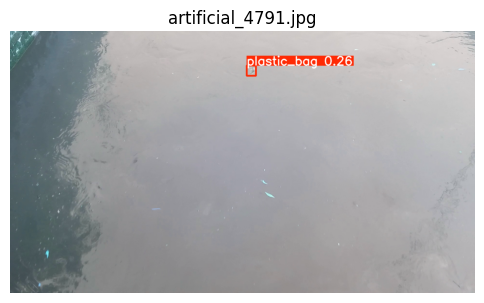

Speed: 0.9ms preprocess, 40.4ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_2982.jpg: 192x320 1 plastic_bag, 1 plastic_wrapper, 1 paper_wrapper, 6.9ms


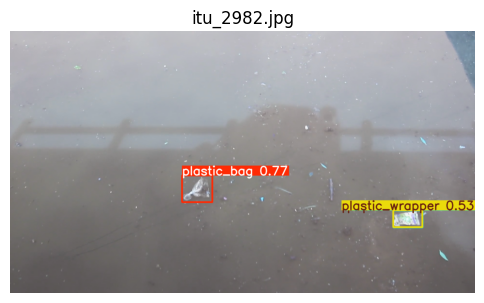

Speed: 1.0ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1810.jpg: 192x320 1 plastic_bag, 6.6ms


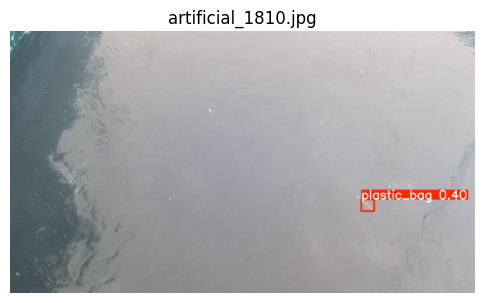

Speed: 0.8ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_42.jpg: 192x320 2 plastic_bags, 1 other, 6.5ms


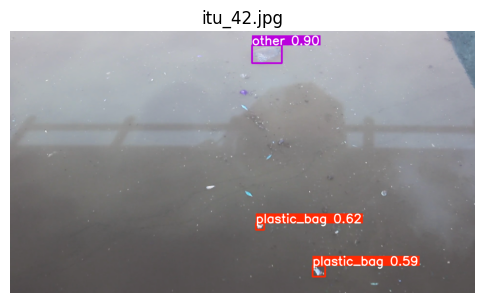

Speed: 0.9ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/lums1_333.jpg: 192x320 1 cluster, 6.5ms


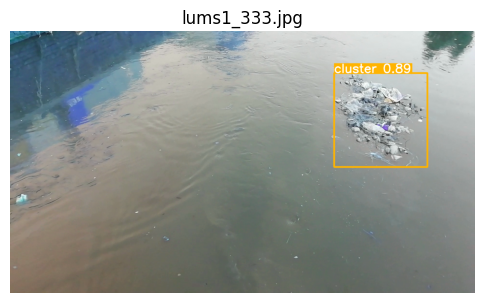

Speed: 0.8ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 192, 320)


In [11]:
# Cell 10 — quick inference display (streaming, smaller images to save memory)
import warnings
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt

# point to your validation images
val_dir = Path('data/images/val')
val_imgs = list(val_dir.glob('*.jpg'))
n_plot = min(len(val_imgs), 5)

if n_plot == 0:
    print(f"No validation images found in {val_dir} to display.")
else:
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    for img_path in random.sample(val_imgs, n_plot):
        # do a streaming, single‐image inference at 320×320
        for result in model.predict(
            str(img_path),
            conf=0.25,
            imgsz=320,     # smaller size to reduce GPU/CPU usage
            device=0,
            stream=True    # stream results one image at a time
        ):
            # result is a single Ultralytics Result object
            arr = result.plot()
            # clean up any NaNs/Infs and clamp to valid [0,255]
            arr = np.nan_to_num(arr, nan=0.0, posinf=255.0, neginf=0.0)
            arr = np.clip(arr, 0, 255).astype(np.uint8)

            plt.figure(figsize=(6,6))
            plt.imshow(arr)
            plt.axis('off')
            plt.title(img_path.name)
            plt.show()


In [12]:
!pip install --quiet ftfy regex transformers torch torchvision

from transformers import CLIPProcessor, CLIPModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00


E0000 00:00:1746285695.442281      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746285695.520044      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [13]:
# reuse your 12 class_names from above
prompts = [f"a photo of a {c}" for c in class_names]
text_inputs = processor(text=prompts, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_embeds = clip.get_text_features(**text_inputs)
    text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)


In [14]:
from PIL import Image
import numpy as np

def detect_with_clip(img_path, yolo_model, clip_model, proc, text_embeds, alpha=0.5, thr=0.25):
    res         = yolo_model.predict(img_path, imgsz=416, conf=0.001)[0]
    boxes       = res.boxes.xyxy.cpu().numpy()
    yolo_scores = res.boxes.conf.cpu().numpy()
    pil = Image.open(img_path).convert("RGB")
    final = []
    for (x1,y1,x2,y2), ys in zip(boxes, yolo_scores):
        crop   = pil.crop((x1,y1,x2,y2))
        inputs = proc(images=crop, return_tensors="pt").to(device)
        with torch.no_grad():
            img_emb = clip_model.get_image_features(**inputs)
            img_emb = img_emb / img_emb.norm(dim=-1, keepdim=True)
            sims    = (img_emb @ text_embeds.T).squeeze(0).cpu().numpy()
        best  = int(np.argmax(sims))
        fused = alpha*ys + (1-alpha)*sims[best]
        if fused > thr:
            final.append((x1,y1,x2,y2, best, fused))
    return final



image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_722.jpg: 256x416 12 plastic_bags, 39.5ms
Speed: 1.4ms preprocess, 39.5ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)


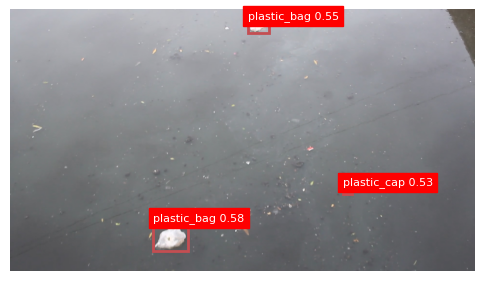


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_4221.jpg: 256x416 15 plastic_bags, 1 shoes, 2 others, 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)


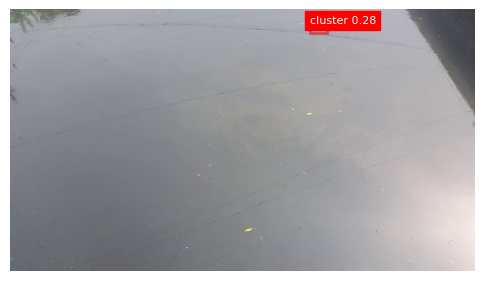


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_1776.jpg: 256x416 10 plastic_bags, 3 others, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)


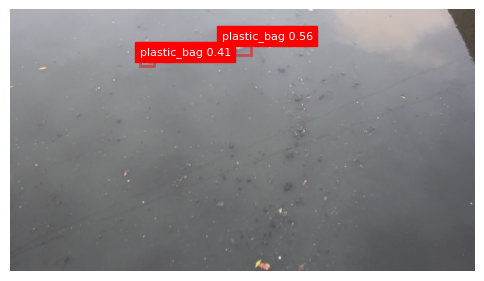


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_520.jpg: 256x416 18 plastic_bags, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)


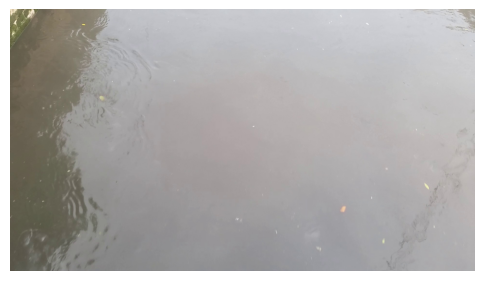


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/lums1_1429.jpg: 256x416 24 plastic_bags, 1 other, 6.7ms
Speed: 1.2ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)


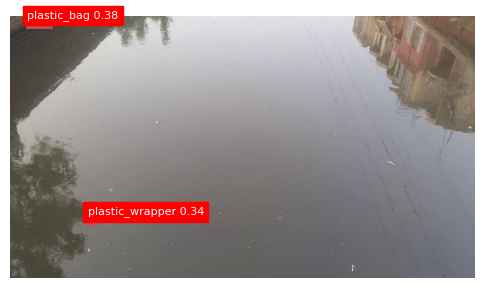

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

for img_path in random.sample(val_imgs, min(5, len(val_imgs))):
    dets = detect_with_clip(img_path, model, clip, processor, text_embeds)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(Image.open(img_path))
    for x1,y1,x2,y2, cls_id, conf in dets:
        ax.add_patch(Rectangle((x1,y1), x2-x1, y2-y1,
                               edgecolor='r', facecolor='none', lw=2))
        ax.text(x1, y1-5, f"{class_names[cls_id]} {conf:.2f}",
                color='white', backgroundcolor='red', fontsize=8)
    ax.axis('off'); plt.show()


In [16]:
import json
from pathlib import Path
from PIL import Image

def yolo_to_coco(image_dir, label_dir, categories, out_json):
    images, annotations, ann_id = [], [], 1
    cats = [{"id": i, "name": n} for i,n in enumerate(categories)]
    for img_id, img_path in enumerate(sorted(Path(image_dir).glob("*.jpg")), start=1):
        w, h = Image.open(img_path).size
        images.append({"id": img_id, "file_name": img_path.name, "width": w, "height": h})
        for line in (Path(label_dir)/f"{img_path.stem}.txt").read_text().splitlines():
            cls, xc, yc, bw, bh = map(float, line.split())
            x  = (xc - bw/2)*w; y = (yc - bh/2)*h
            box = [x, y, bw*w, bh*h]
            annotations.append({
                "id": ann_id, "image_id": img_id, "category_id": int(cls),
                "bbox": box, "area": box[2]*box[3], "iscrowd": 0
            })
            ann_id += 1
    coco = {"images": images, "annotations": annotations, "categories": cats}
    with open(out_json, "w") as f:
        json.dump(coco, f)
    print(f"Wrote {out_json}: {len(images)} images, {len(annotations)} annotations")

yolo_to_coco(
    image_dir="data/images/val",
    label_dir="data/labels/val",
    categories=class_names,
    out_json="data/val_coco.json"
)


Wrote data/val_coco.json: 2530 images, 9064 annotations


In [17]:
import json
from pathlib import Path
from pycocotools.coco import COCO

# 1) load COCO ground truth so we can map filenames→image_id
coco_gt        = COCO("data/val_coco.json")
filename_to_id = {info['file_name']: img_id for img_id,info in coco_gt.imgs.items()}

# 2) run one batched pass over all your val images at once
#    (YOLOv8 will internally batch for you, faster and more memory‐efficient)
results = model.predict(
    source="data/images/val/*.jpg",  # glob all your val jpgs
    conf=0.001,                      # very low so we capture everything
    batch=16,                        # adjust up/down to your GPU
    device=0,                        # or "cpu"
    verbose=False,                   # silence per‐image prints
)

# 3) post‐process the unified results list into a COCO‐style JSON
preds = []
for r in results:
    fname = Path(r.path).name
    if fname not in filename_to_id:
        continue
    image_id = filename_to_id[fname]
    boxes   = r.boxes.xyxy.cpu().numpy()           # Nx4
    scores  = r.boxes.conf.cpu().numpy()           # N
    classes = r.boxes.cls.cpu().numpy().astype(int)  # N
    for (x1,y1,x2,y2), s, c in zip(boxes, scores, classes):
        preds.append({
            "image_id":    image_id,
            "category_id": int(c),
            "bbox":        [float(x1), float(y1), float(x2-x1), float(y2-y1)],
            "score":       float(s)
        })

# 4) write out only once
with open("baseline_yolo_preds.json", "w") as f:
    json.dump(preds, f, indent=2)
print(f"✔ Wrote baseline_yolo_preds.json with {len(preds)} boxes")


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
✔ Wrote baseline_yolo_preds.json with 53381 boxes


In [22]:
# Cell 17 — batched CLIP‐rescored predictions (fixed & skip empty boxes)
import json
from pathlib import Path
from pycocotools.coco import COCO
from PIL import Image
import torch

# 1) load COCO GT so we can map filenames → image_id
coco_gt        = COCO("data/val_coco.json")
filename_to_id = {info["file_name"]: img_id for img_id, info in coco_gt.imgs.items()}

# 2) run a quiet, streaming YOLO pass over ALL val images
val_pattern = "data/images/val/*.jpg"
results = model.predict(
    source=val_pattern,
    conf=0.001,    # capture all boxes
    batch=16,      # tune to your GPU
    device=0,
    stream=True
)

# 3) CLIP‐rescore each box, skipping zero-area boxes
alpha, thr = 0.5, 0.25
preds = []

for r in results:
    fname = Path(r.path).name
    image_id = filename_to_id.get(fname)
    if image_id is None:
        continue

    pil = Image.open(r.path).convert("RGB")
    boxes  = r.boxes.xyxy.cpu().numpy()   # (N,4)
    scores = r.boxes.conf.cpu().numpy()   # (N,)

    for (x1, y1, x2, y2), yscore in zip(boxes, scores):
        w, h = x2 - x1, y2 - y1
        if w <= 0 or h <= 0:
            continue  # skip degenerate boxes

        crop = pil.crop((x1, y1, x2, y2)).convert("RGB")
        # always wrap in a list for the processor
        inputs = processor(images=[crop], return_tensors="pt", padding=True).to(device)
        with torch.no_grad():
            img_emb = clip.get_image_features(**inputs)
        # img_emb shape is (1, D)
        img_emb = img_emb / img_emb.norm(dim=-1, keepdim=True)
        sims = (img_emb @ text_embeds.T).squeeze(0).cpu().numpy()  # (num_classes,)
        best = int(sims.argmax())
        fused = alpha * yscore + (1 - alpha) * sims[best]
        if fused > thr:
            preds.append({
                "image_id":    image_id,
                "category_id": best,
                "bbox":        [float(x1), float(y1), float(w), float(h)],
                "score":       float(fused),
            })

# 4) write out the CLIP‐rescored JSON
with open("clip_yolo_preds.json", "w") as f:
    json.dump(preds, f, indent=2)

print(f"✔ Wrote clip_yolo_preds.json with {len(preds)} boxes")


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!

image 1/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1002.jpg: 192x320 12 plastic_bags, 1.0ms
image 2/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1005.jpg: 192x320 11 plastic_bags, 1.0ms
image 3/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1013.jpg: 192x320 9 plastic_bags, 1.0ms
image 4/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_102.jpg: 192x320 17 plastic_bags, 2 plastic_wrappers, 2 others, 1.0ms
image 5/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1021.jpg: 192x320 13 plastic_bags, 1.0ms
image 6/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1029.jpg: 192x320 23 plastic_bags, 1.0ms
image 7/2530 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_1035.jpg: 192x320 15 plastic_bags, 1.0ms
image 8/2530 /kaggle/working/keras-yolo3-attention/data

In [23]:
# Cell 18 — COCO mAP evaluation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# 1) load ground truth from our COCO JSON
coco_gt = COCO("data/val_coco.json")

# 2) load your two sets of detections
coco_dt_y    = coco_gt.loadRes("baseline_yolo_preds.json")
coco_dt_clip = coco_gt.loadRes("clip_yolo_preds.json")

# 3) helper to run COCOeval
def coco_eval(gt, dt):
    evo = COCOeval(gt, dt, iouType="bbox")
    evo.params.imgIds = sorted(gt.getImgIds())
    evo.evaluate()
    evo.accumulate()
    evo.summarize()
    return evo.stats[0]  # return mAP [.50:.95]

mAP_yolo = coco_eval(coco_gt, coco_dt_y)
mAP_clip = coco_eval(coco_gt, coco_dt_clip)

print(f"\n→ YOLOv8s      mAP@.50:.95 = {mAP_yolo:.3f}")
print(f"→ YOLOv8s+CLIP mAP@.50:.95 = {mAP_clip:.3f}")


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.69s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.31s).
Accumulating evaluation results...
DONE (t=0.74s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.319
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.496
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.670
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

In [24]:
# Cell 19 — classification‐only accuracy
import json, numpy as np
from sklearn.metrics import accuracy_score
from collections import defaultdict

# load predictions and ground truth
base = json.load(open("baseline_yolo_preds.json"))
clip = json.load(open("clip_yolo_preds.json"))
gt   = json.load(open("data/val_coco.json"))

# bucket by image_id
b_by_img = defaultdict(list)
c_by_img = defaultdict(list)
g_by_img = defaultdict(list)
for p in base: b_by_img[p["image_id"]].append(p)
for p in clip: c_by_img[p["image_id"]].append(p)
for a in gt["annotations"]: g_by_img[a["image_id"]].append(a)

def iou(b1, b2):
    x1,y1,w1,h1 = b1; x2,y2,w2,h2 = b2
    xx1,yy1 = max(x1,x2), max(y1,y2)
    xx2,yy2 = min(x1+w1, x2+w2), min(y1+h1, y2+h2)
    iw, ih  = max(0, xx2-xx1), max(0, yy2-yy1)
    inter   = iw*ih
    uni     = w1*h1 + w2*h2 - inter
    return inter/uni if uni>0 else 0

y_cls, c_cls, t_cls = [], [], []
for img_id, gts in g_by_img.items():
    for g in gts:
        gt_box, gt_c = g["bbox"], g["category_id"]
        # best YOLO match
        best_b, best_i = None, 0
        for p in b_by_img[img_id]:
            iou_val = iou(p["bbox"], gt_box)
            if iou_val > best_i:
                best_i, best_b = iou_val, p
        if best_i > 0.5:
            y_cls.append(best_b["category_id"])
            t_cls.append(gt_c)
            # best CLIP match
            best_c, best_ic = None, 0
            for p in c_by_img[img_id]:
                i2 = iou(p["bbox"], gt_box)
                if i2 > best_ic:
                    best_ic, best_c = i2, p
            c_cls.append(best_c["category_id"] if best_c else -1)

print("YOLOv8s classification acc:    ", accuracy_score(t_cls, y_cls))
print("YOLOv8s+CLIP classification acc:", accuracy_score(t_cls, c_cls))


YOLOv8s classification acc:     0.9063159200893411
YOLOv8s+CLIP classification acc: 0.2815485792281921


In [25]:
!zip -r runs.zip runs


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: runs/ (stored 0%)
  adding: runs/train/ (stored 0%)
  adding: runs/train/garbage_v8s/ (stored 0%)
  adding: runs/train/garbage_v8s/args.yaml (deflated 53%)
  adding: runs/train/garbage_v8s/weights/ (stored 0%)
  adding: runs/train/garbage_v8s2/ (stored 0%)
  adding: runs/train/garbage_v8s2/args.yaml (deflated 52%)
  adding: runs/train/garbage_v8s2/val_batch0_pred.jpg (deflated 25%)
  adding: runs/train/garbage_v8s2/train_batch25300.jpg (deflated 30%)
  adding: runs/train/garbage_v8s2/P_curve.png (deflated 6%)
  adding: runs/train/garbage_v8s2/val_batch2_pred.jpg (deflated 21%)
  adding: runs/train/garbage_v8s2/confusion_matrix_normalized.png (deflated 18%)
  adding: runs/train/garbage_v8s2/val_batch1_pred.jpg (deflated 24%)
  adding: runs/train/garbage_v8s2/labels_correlogram.jpg (deflated 35%)
  adding: runs/train/garbage_v8s2/train_batch1.jpg (deflated 10%)
  adding: runs/train/garbage_v8s2/val_batch2_labels.jpg (deflated 19%)
  adding: runs/train/garbage_v8s2/weights/ (sto